In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
income_data = pd.read_csv('./Product_sales.csv')

income_data.head()
income_data.shape

(467, 2)

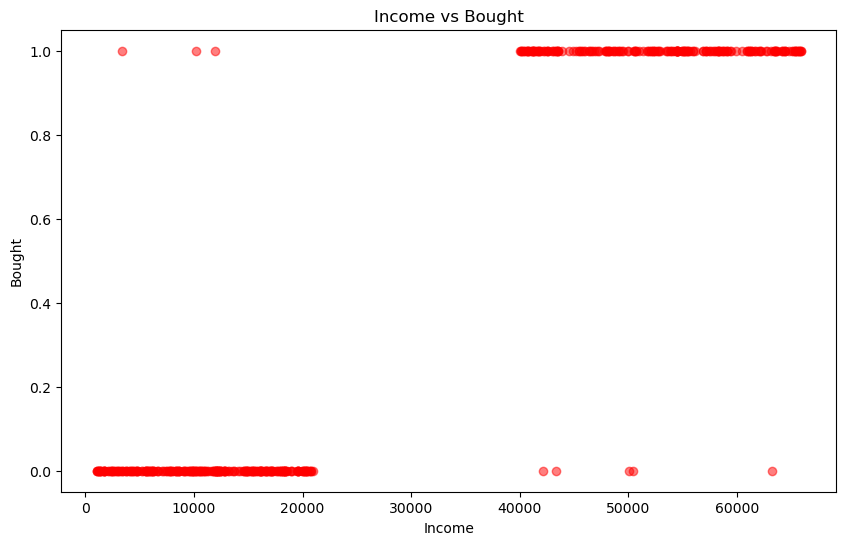

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(income_data['Income'], income_data['Bought'], color='red', alpha=0.5)
plt.title('Income vs Bought')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()


In [5]:
X = income_data['Income'].values
X_normalize = (X - X.mean()) / X.std()

y = income_data['Bought'].values

In [6]:
alpha = 0.001
epochs = 1000
w1 = 0
b = 0

# optimizing the fucking parameters using GRADIENT
for epoch in range(epochs):
    y_pred = 1 / (1 + np.exp(-(X_normalize * w1 + b)))  

    # error = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    error = y_pred - y

    #derivative of the loss function with respect to w1 and b
    derivative_b = np.mean(error)
    derivative_w1 = np.mean(error * X_normalize)

    #update the parameters
    #step size
    step_size_b = alpha * derivative_b
    step_size_w1 = alpha * derivative_w1

    b = b - step_size_b
    w1 = w1 - step_size_w1

In [12]:
def predict(X, b, w1):
    """Make predictions using the logistic regression model."""
    z = w1 * X + b
    return 1 / (1 + np.exp(-z))

predictions = predict(X_normalize, b, w1)
binary_preds = (predictions > 0.5).astype(int)

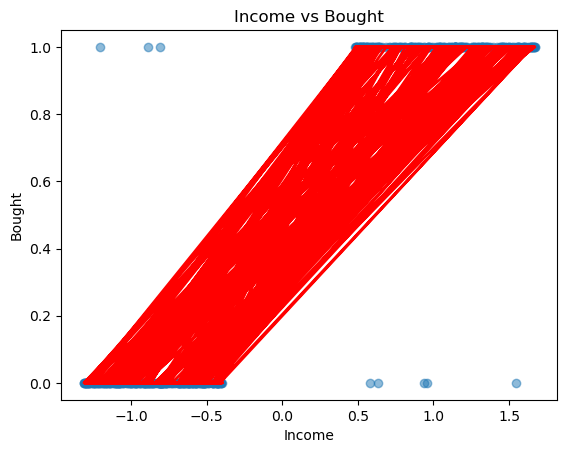

In [14]:
plt.scatter(X_normalize, y, alpha=0.5)
plt.plot(X_normalize, binary_preds, color='red', linewidth=2)
plt.title('Income vs Bought')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()

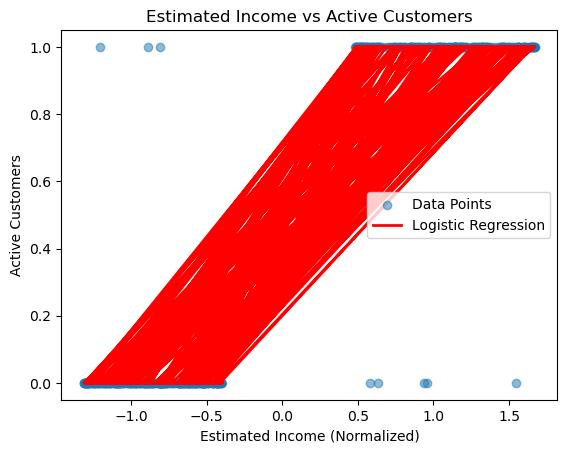

In [11]:
# let's use logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Reshape X for sklearn
X_reshaped = X_normalize.reshape(-1, 1)
# Create and fit the model
model = LogisticRegression()
model.fit(X_reshaped, y)
# Make predictions
y_pred_sklearn = model.predict(X_reshaped)
# Plotting the results
plt.scatter(X_normalize, y, alpha=0.5, label='Data Points')
plt.plot(X_normalize, y_pred_sklearn, color='red', linewidth=2, label='Logistic Regression')
plt.title('Estimated Income vs Active Customers')
plt.xlabel('Estimated Income (Normalized)')
plt.ylabel('Active Customers')
plt.legend()
plt.show()

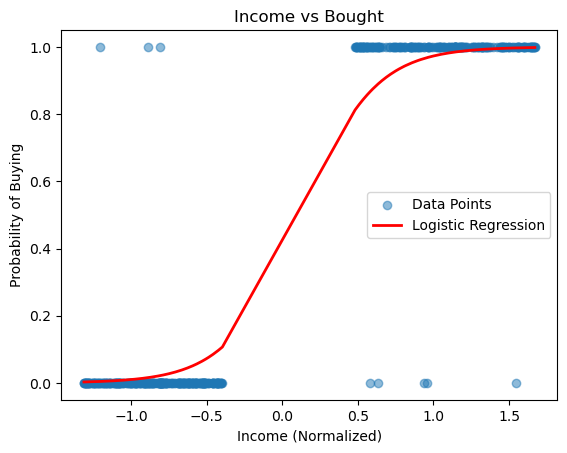

In [16]:
from sklearn.linear_model import LogisticRegression

X_reshaped = X_normalize.reshape(-1, 1)
model = LogisticRegression()
model.fit(X_reshaped, y)

y_prob = model.predict_proba(X_reshaped)[:, 1]

# Sort for better line plotting
sorted_indices = np.argsort(X_normalize)
plt.scatter(X_normalize, y, alpha=0.5, label='Data Points')
plt.plot(X_normalize[sorted_indices], y_prob[sorted_indices], color='red', linewidth=2, label='Logistic Regression')
plt.title('Income vs Bought')
plt.xlabel('Income (Normalized)')
plt.ylabel('Probability of Buying')
plt.legend()
plt.show()
